In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [45]:
data = pd.read_csv('../datasets/dropout_ratio.csv')
data.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


# LOADING DATA 

In [46]:
dropout = pd.read_csv('../datasets/dropout_ratio.csv')
enroll = pd.read_csv('../datasets/enrollment_ratio.csv')
comps = pd.read_csv('../datasets/percentage-of-schools-with-comps.csv')
electricity = pd.read_csv('../datasets/percentage-of-schools-with-electricity.csv')
water = pd.read_csv('../datasets/percentage-of-schools-with-water-facility.csv')
boys_toilet = pd.read_csv('../datasets/schools-with-boys-toilet.csv')
girls_toilet = pd.read_csv('../datasets/schools-with-girls-toilet.csv')



In [47]:
dropout.set_index('State_UT', inplace=True)
electricity.set_index('State_UT',inplace=True)
enroll.set_index('State_UT', inplace=True)
comps.set_index('State_UT',inplace=True)
water.set_index('State/UT', inplace=True)
boys_toilet.set_index('State_UT',inplace=True)
girls_toilet.set_index('State_UT',inplace=True)

In [73]:
sm, md, lg = 12,9,10
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [49]:
boys = pd.read_csv('../datasets//schools-with-boys-toilet.csv')
girls = pd.read_csv('../datasets/schools-with-girls-toilet.csv')


In [50]:
len(boys.State_UT.unique()), len(girls.State_UT.unique())

(37, 37)

In [51]:
boys.head(2)

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.0,100.0,100.0,100.0,0.0,0.0,100.0,0.0,100.00


In [52]:
boys_melt = pd.melt(boys, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melt = pd.melt(girls, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

In [53]:
boys_melt.head(2)

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
1,Andaman & Nicobar Islands,2014-15,Primary_Only,100.00


In [54]:
categ = boys.columns.to_list()[5:] # All student category type in a list

# TOILET FACILITIES FOR BOYS IN  ALL STUDENT CATEGORIES


In [ ]:
for category in categ:
    tmp_boys = boys_melt[boys_melt['School_Level'] == category]
    mean_tmp_boys = tmp_boys.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_boys.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with boys Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_boys.iloc[np.where(mean_tmp_boys['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_boys.iloc[mean_tmp_boys.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest)) # In the case when we have to many states that have 100 toilet facilities and can't display all
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for boys while `{}` state(s) have the most toilet facilities of 100 for boys and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))

SCHOOLS HAVING COMPUTERS


In [58]:
df_school_comps = pd.read_csv('../datasets/percentage-of-schools-with-comps.csv')

In [59]:
df_school_comps.head(2)

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.0,100.00,97.92,0.0,0.0,100.0,0.0,53.06
1,Andaman & Nicobar Islands,2014-15,30.94,76.54,92.11,100.0,94.74,100.00,0.0,0.0,100.0,0.0,57.25


<AxesSubplot:xlabel='State_UT'>

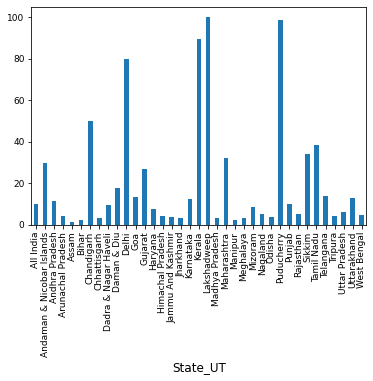

In [74]:
df_school_comps.groupby('State_UT')['Primary_Only'].mean().plot(kind='bar')